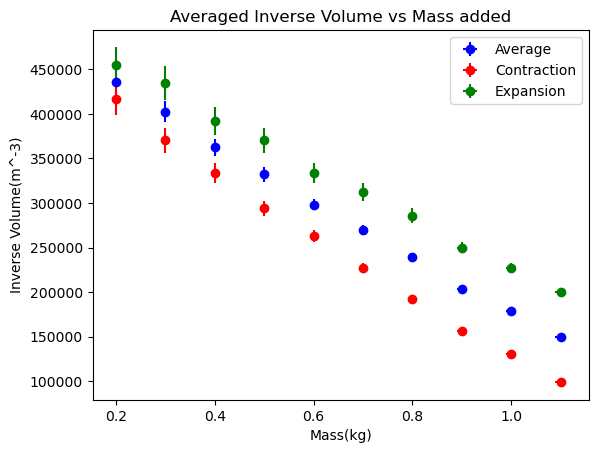

In [14]:
"""Code for plotting data"""

import matplotlib.pyplot as plt
import numpy as np

fname = 'AveragedData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(0, 1, 2, 3))

x = data[:, 0]
y = data[:, 2]
avg_x_sigma = data[:, 1]
avg_y_sigma = data[:, 3]

plt.errorbar(x, y, avg_y_sigma, avg_x_sigma, "bo")

fname = 'GasContractsData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(1, 2, 7, 8))

x = data[:, 0]
y = data[:, 2]
con_x_sigma = data[:, 1]
con_y_sigma = data[:, 3]

plt.errorbar(x, y, yerr=con_y_sigma, xerr=con_x_sigma, fmt='ro')

fname = 'GasExpandsData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(1, 2, 7, 8))

x = data[:, 0]
y = data[:, 2]
ex_x_sigma = data[:, 1]
ex_y_sigma = data[:, 3]

plt.errorbar(x, y, yerr=ex_y_sigma, xerr=ex_x_sigma, fmt='go')

plt.title("Averaged Inverse Volume vs Mass added")
plt.legend(["Average", "Contraction", "Expansion"])
plt.xlabel("Mass(kg)")
plt.ylabel("Inverse Volume(m^-3)")

plt.show()

Fit parameters:
slope = 2.801e+05 +/- 5.062e+03
1/v0 = 5.071e+05 +/- 4.850e+03

Goodness of fit - chi square measure:
Chi2 = 5.0060727609677445, Chi2/dof = 0.6257590951209681



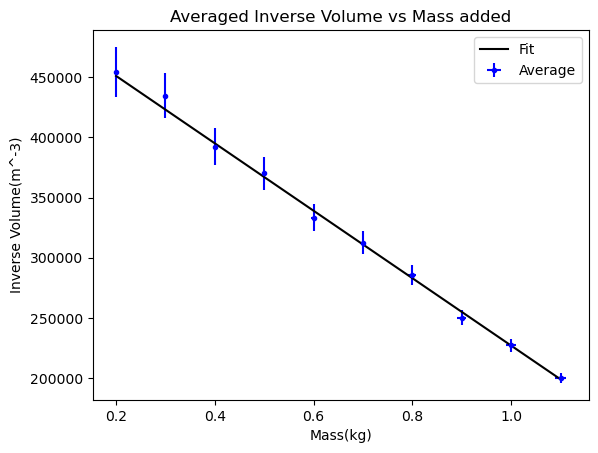

In [17]:
"""Code for fitting and finding chi squared of data vs fit"""

from scipy.optimize import curve_fit

def lin_fit(x, k, b):
    return -k*x+b

guesses = (-.320,.500)


fit_params, fit_cov = curve_fit(lin_fit, x, y, sigma=avg_y_sigma, p0=guesses,
                                maxfev=10**5)

# read out parameter results
param_names = ['slope', '1/v0']

fit_params_error = np.sqrt(np.diag(fit_cov))

print("Fit parameters:")
for i in range(len(fit_params)):
    print('{} = {:.3e} +/- {:.3e}'.format(param_names[i],
                                          fit_params[i],
                                          fit_params_error[i]))


# function that  calculates the chi square value of a fit
def chi_square(fit_parameters, x, y, sigma):
    #
    return np.sum((y-lin_fit(x, *fit_parameters))**2/sigma**2)


# calculate and print chi square as well as the per degree-of-freedom value
chi2 = chi_square(fit_params, x, y, avg_y_sigma)
dof = len(x) - len(fit_params)
print("\nGoodness of fit - chi square measure:")
print("Chi2 = {}, Chi2/dof = {}\n".format(chi2, chi2/dof))

marr = np.linspace(0.2, 1.1, 1000)
varr = -fit_params[0] * marr + fit_params[1]

plt.errorbar(x, y, yerr=ex_y_sigma, xerr=ex_x_sigma, fmt='b.')
plt.plot(marr, varr, 'k-')
plt.title("Averaged Inverse Volume vs Mass added")
plt.legend(["Fit", "Average", "Contraction", "Expansion"])
plt.xlabel("Mass(kg)")
plt.ylabel("Inverse Volume(m^-3)")

plt.show()

In [18]:
"""Code for converting fit to R"""

n = 8.065E-5
g = 9.81
A = 1.7544E-4
uA = 2.3337E-6
T = 295.15
k = fit_params[0]
uk = fit_params_error[0]

R = g / (A * n * T * k)
uR = g / (n * T) * np.sqrt(A ** 2 * uk ** 2 + k ** 2 * uA ** 2)/(A ** 2 * k ** 2)

print("Gas constant R = {:.3f} \u00B1 {:.3f} J/(K*mol)".format(R, uR))


Gas constant R = 8.386 ± 0.188 J/(K*mol)


Displaying plot 1


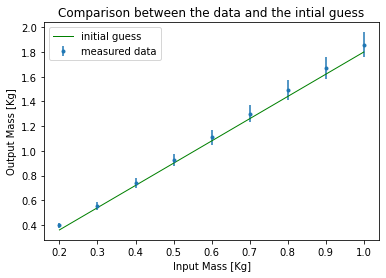


Goodness of fit - chi square measure:
Chi2 = 0.6801208531748653, Chi2/dof = 0.09716012188212361

Fit parameters:
gain = 1.811e+00 +/- 6.714e-02
y intercept = 2.777e-02 +/- 2.727e-02
Displaying plot 2


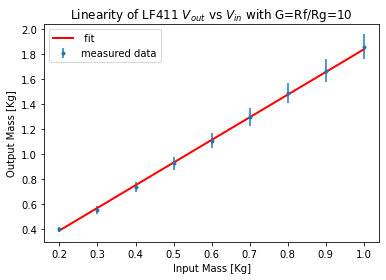


Residual information:
100.0% of data points agree with fit

Displaying plot 3


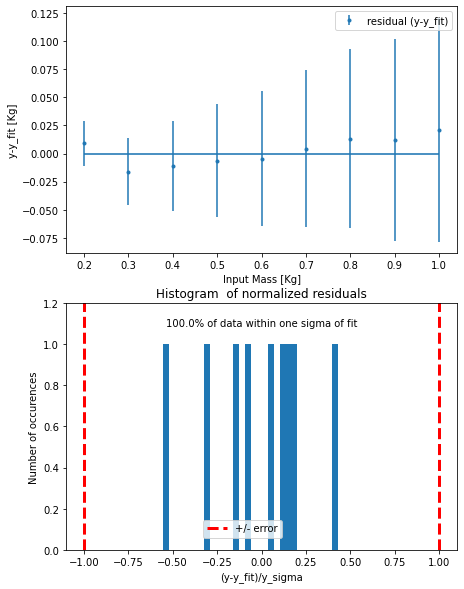

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#LIST OF ALL INPUTS

# fname is assumed to be a .csv file (comma separated values). All rows
# containing non-number text (example: names for each column) must begin
# with "#". By default, the oscilloscope generates text column names
# without "#"--it must be added manually. The .csv file must be in the same
# folder as this fit program, otherwise the full file extension must be added
# to fname: e.g. fname = 'folder/subfolder/subsubfolder/file.csv'
fname = 'Force meter calibration.csv'
# the data file fname has x data (first column) and y data (second column) and
# the uncertianty in y (third column).
# Enter the name and units of each column here so that the plots are properly
# labeled. e.g. x_name = 'Time', x_units = 'ms', y_name = 'Voltage', y_units
# = 'V'.
x_name = 'Input Mass'
x_units = 'Kg'
y_name = 'Output Mass'
y_units = 'Kg'
# it is often necessary to provide good initial guesses for the parameters in order
# for the chi2 fit to be converge correctly.  If the guesses are
#not good  the fitting routine  may not converge on the global minimum in Chi^2.
guesses = (1.8, 0.0)


###############################################################################
# loads data, plots guessed curve
###############################################################################

# definition of the fit function
def fit_function(x, m, b):
    return m*x+b


# dydx is the drevative the fit function which in this case is constant ~10
dydx = 10.
#load the file "fname", defined above
data = np.loadtxt(fname, delimiter=',', comments='#', usecols=(0, 1, 2, 3))
# access the data columns and assign variables x,y  and  y_sigma
x = data[:, 0]
y = data[:, 2]
#y_sigma = data[:,3]
y_sigma = np.sqrt((data[:, 3])**2+dydx**2*data[:, 1]**2)
# define an array of points  used or plotting the theory function
x_fitfunc = np.linspace(min(x), max(x), 500)

#compares the guessed curve to the data for visual reference
y_guess = fit_function(x_fitfunc, *guesses)
plt.errorbar(x, y, yerr=y_sigma, marker='.',
             linestyle='', label="measured data")
plt.plot(x_fitfunc, y_guess, marker="", linestyle="-", linewidth=1, color="g",
         label="initial guess")
plt.xlabel('{} [{}]'.format(x_name, x_units))
plt.ylabel('{} [{}]'.format(y_name, y_units))
plt.title('Comparison between the data and the intial guess')
plt.legend(loc='best', numpoints=1)
print('Displaying plot 1')
plt.show()
plt.figure()


# fit the data to fit_function. fit_params is the resultant parameters, fit_cov
# is the covariance matrix between all the parameters. maxfev=10**5 means the
# fitting procedure is iterated at maximum 10^5 times before giving up.
fit_params, fit_cov = curve_fit(fit_function, x, y, sigma=y_sigma, p0=guesses,
                                maxfev=10**5)

###############################################################################
# prints the chi2
###############################################################################

# function that  calculates the chi square value of a fit


def chi_square(fit_parameters, x, y, sigma):
    #
    return np.sum((y-fit_function(x, *fit_parameters))**2/sigma**2)


# calculate and print chi square as well as the per degree-of-freedom value
chi2 = chi_square(fit_params, x, y, y_sigma)
dof = len(x) - len(fit_params)
print("\nGoodness of fit - chi square measure:")
print("Chi2 = {}, Chi2/dof = {}\n".format(chi2, chi2/dof))

###############################################################################
# prints the fit parameters (with uncertainty)
###############################################################################

# the covariance matrix is rescaled to cancel the inverse scaling that is
# performed for numerical reasons during execution of curve_fit -- do not
# change this line!
fit_cov = fit_cov*dof/chi2
# calculate the standard deviation as uncertainty of the fit parameters
fit_params_error = np.sqrt(np.diag(fit_cov))

# read out parameter results
param_names = ['gain', 'y intercept']
print("Fit parameters:")
for i in range(len(fit_params)):
    print('{} = {:.3e} +/- {:.3e}'.format(param_names[i],
                                          fit_params[i],
                                          fit_params_error[i]))


# prints out the covariance between all variables. Uncomment this code to see
# the results of this more sophisticated statistical measure.
#print "\nCovariance between fit parameters:"
#for i,fit_covariance in enumerate(fit_cov):
#    for j in xrange(i+1,len(fit_covariance)) :
#        print "{} and {} : {:.3e}".format(param_names[i],
#                                          param_names[j],
#                                          fit_cov[i,j])

###############################################################################
# plots the data and the fit curve
###############################################################################

# y_fitfunc is the curve using the parameters calculated from the fit
#x_fit = np.linspace(min(f),max(f),len(f))
y_fitfunc = fit_function(x_fitfunc, *fit_params)
# plots y, and y_fit on the same plot.
# marker='.' : data points are not indicated by markers
# linestyle= '-' : a continuous line is drawn
# linewidth=2 : the line thickness is set to 2
# color='r' : the color of the line is set to red
# label=string : the string is shown in the legend
plt.errorbar(x, y, yerr=y_sigma, marker='.',
             linestyle='', label="measured data")
plt.plot(x_fitfunc, y_fitfunc, marker="", linestyle="-", linewidth=2, color="r",
         label=" fit")
# add axis labels and title
plt.xlabel('{} [{}]'.format(x_name, x_units))
plt.ylabel('{} [{}]'.format(y_name, y_units))
plt.title(r'Linearity of LF411 $V_{out}$ vs $V_{in}$ with G=Rf/Rg=10')
# set the x and y boundaries of your plot
#plt.xlim(lower_x,upper_x)
#plt.ylim(lower_y,upper_y)
# show a legend. loc='best' places legend where least amount of data is
# obstructed.
plt.legend(loc='best', numpoints=1)
print('Displaying plot 2')
# plt.show() may or may not need to be commented out depending on your python
# editor (spyder) settings.
plt.show()


###############################################################################
# plots residual and histogram of residual. Don't touch this par tof the code
###############################################################################

# residual is the difference between the data and theory
y_fit = fit_function(x, *fit_params)
residual = y-y_fit
#calculate normalized residuals
normresidual = residual/y_sigma
# creates a histogram of the normalized residuals
hist, bins = np.histogram(normresidual, bins=30)

# this complicated code produces a figure with a plot of the residuals as well
# as a histogram of the residuals. You do not need to understand this code.
fig = plt.figure(figsize=(7, 10))
ax1 = fig.add_subplot(211)
ax1.errorbar(x, residual, yerr=y_sigma, marker='.', linestyle='',
             label="residual (y-y_fit)")
ax1.hlines(0, np.min(x), np.max(x), lw=2, alpha=0.8)
ax1.set_xlabel('{} [{}]'.format(x_name, x_units))
ax1.set_ylabel('y-y_fit [{}]'.format(y_units))
ax1.legend(loc='best', numpoints=1)
ax2 = fig.add_subplot(212)
ax2.bar(bins[:-1], hist, width=bins[1]-bins[0])

ax2.set_ylim(0, 1.2*np.max(hist))
ax2.set_xlabel('(y-y_fit)/y_sigma')
ax2.set_ylabel('Number of occurences')
plt.title('Histogram  of normalized residuals')
#if y_sigma != None:
# within_err is the percentage of data points whose error bars overlap with
# the fit. If chi2/dof = 1, within_error ~ 66% (one standard deviation)
within_err = 100.*np.sum((residual <= y_sigma) &
                         (residual >= -y_sigma))/len(residual)
print("\nResidual information:")
print('{:.1f}% of data points agree with fit'.format(within_err))
ax2.vlines(-1.0, 0, np.max(hist)*1.3, lw=3, color='r', linestyles='--')
ax2.vlines(+1.0, 0, np.max(hist)*1.3, lw=3, color='r',
           linestyles='--', label='+/- error')
ax2.text(0.0, np.max(hist)*1.1, '{:.1f}% of data within one sigma of fit'.format(within_err),
         horizontalalignment='center', verticalalignment='center')
ax2.legend(loc=(0.35, 0.05))

print('\nDisplaying plot 3')
plt.show()
